# Chapitre I, exercice 4 : Etude préliminaire du CAC 40

## Importation des données

### Option 1 : à partir d'un fichier de données

#### Source : Datastream

Datastream est une base de données payante accessible à la BU Dauphine. Elle présente l'avantage de fournir des données complètes. Le séparateur de décimale est le point "."

In [5]:
CAC40_df_1<-read.csv2("./cac40_datastream.csv",dec=".",col.names = c('Date','CAC40'))
head(CAC40_df_1)

,Date,CAC40
,<chr>,<dbl>
1,09/07/1987,1482.89
2,10/07/1987,1490.42
3,13/07/1987,1490.42
4,14/07/1987,1490.42
5,15/07/1987,1490.42
6,16/07/1987,1474.22


On convertit la colonne Date au format date Year/Month/Day

In [6]:
CAC40_df_1$Date<-as.Date(CAC40_df_1$Date,format = "%d/%m/%Y")
tail(CAC40_df_1$Date)


#library(lubridate)
#CAC40_df_1$Date<-dmy(CAC40_df_1$Date)

[1] "2023-06-19" "2023-06-20" "2023-06-21" "2023-06-22" "2023-06-23"
[6] "2023-06-26"

On vérifie qu'il n'y a pas de données manquantes

In [7]:
sapply(CAC40_df_1,function(x) sum(is.na(x)))

Date CAC40 
    0     0

Les données commencent en "1987-07-09". On décide d'étudier la série à partir de "1990-01-01" en partie pour avoir le même échantillon que les autres sources de données.

In [ ]:
CAC40_df_1<-CAC40_df_1[CAC40_df_1$Date>="1990-01-01",]

#### Source : fichier csv provenant de Yahoo Finance
Les données de Yahoo contiennent des données manquantes représentées par le terme ''null''. Avec R, "null" n'est pas le symbole habituel des données manquantes qui est "na". Dans l'importation des données à partir de la fonction read.csv, on ajoute l'option na.strings=c("null") pour lui indiquer que le symbole des données manquantes dans le fichier ^FCHI.csv.

In [9]:
library(readr)
CAC40_df_2<-read.csv("./^FCHI.csv",na.strings=c("null"))
class(CAC40_df_2)
str(CAC40_df_2)

[1] "data.frame"

'data.frame':	8605 obs. of  7 variables:
 $ Date     : chr  "1990-03-01" "1990-03-02" "1990-03-05" "1990-03-06" ...
 $ Open     : num  1836 1831 1866 1869 1874 ...
 $ High     : num  1838 1860 1874 1875 1881 ...
 $ Low      : num  1827 1831 1862 1866 1874 ...
 $ Close    : num  1832 1860 1874 1872 1880 ...
 $ Adj.Close: num  1832 1860 1874 1872 1880 ...
 $ Volume   : int  0 0 0 0 0 0 0 0 0 0 ...


Décompte des données manquantes :

In [10]:
sapply(CAC40_df_2,function(x) sum(is.na(x)))

Date      Open      High       Low     Close Adj.Close    Volume 
        0       147       147       147       147       147       147

Il existe plusieurs manières de gérer les données manquantes. On décide ici de supprimer les dates ayant des données manquantes car elles peuvent empécher l'éxécution de certaines fonctions de R.

In [11]:
CAC40_df_2<-na.omit(CAC40_df_2)
sapply(CAC40_df_2,function(x) sum(is.na(x)))

Date      Open      High       Low     Close Adj.Close    Volume 
        0         0         0         0         0         0         0

Rappel : Les fonctions
class() : affiche la classe d'un objet
str() : affiche la structure d'un objet
head() : affiche les premières lignes d'un objet
tail() : affiche les dernières lignes d'un objet


In [12]:
class(CAC40_df_2)

[1] "data.frame"

In [13]:
str(CAC40_df_2)

'data.frame':	8458 obs. of  7 variables:
 $ Date     : chr  "1990-03-01" "1990-03-02" "1990-03-05" "1990-03-06" ...
 $ Open     : num  1836 1831 1866 1869 1874 ...
 $ High     : num  1838 1860 1874 1875 1881 ...
 $ Low      : num  1827 1831 1862 1866 1874 ...
 $ Close    : num  1832 1860 1874 1872 1880 ...
 $ Adj.Close: num  1832 1860 1874 1872 1880 ...
 $ Volume   : int  0 0 0 0 0 0 0 0 0 0 ...
 - attr(*, "na.action")= 'omit' Named int [1:147] 32 33 44 49 61 68 120 176 213 214 ...
  ..- attr(*, "names")= chr [1:147] "32" "33" "44" "49" ...


In [ ]:
head(CAC40_df_2)
tail(CAC40_df_2)

,Date,Open,High,Low,Close,Adj.Close,Volume
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,1990-03-01,1836,1838,1827,1832,1832,0
2,1990-03-02,1831,1860,1831,1860,1860,0
3,1990-03-05,1866,1874,1862,1874,1874,0
4,1990-03-06,1869,1875,1866,1872,1872,0
5,1990-03-07,1874,1881,1874,1880,1880,0
6,1990-03-08,1891,1923,1891,1917,1917,0


,Date,Open,High,Low,Close,Adj.Close,Volume
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
8600,2023-06-19,7353.31,7362.44,7302.63,7314.05,7314.05,0
8601,2023-06-20,7303.24,7322.57,7281.12,7294.17,7294.17,55853400
8602,2023-06-21,7273.89,7297.85,7246.86,7260.97,7260.97,48414000
8603,2023-06-22,7194.26,7206.89,7145.06,7203.28,7203.28,53704500
8604,2023-06-23,7165.38,7193.78,7128.64,7163.42,7163.42,51938700
8605,2023-06-26,7175.88,7203.46,7105.72,7184.35,7184.35,52606600


### Option 2 : Importation des données à partir d'un site internet

#### librairie quantmod

In [20]:
install.packages('TT')
install.packages('quantmod')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘xts’, ‘zoo’, ‘TTR’




In [22]:
library(TT)
library(quantmod)


CAC40 <-getSymbols('^FCHI',auto.assign = FALSE,from ='1990-01-01')
class(CAC40) # an xts object

CAC40_df<-data.frame(date=index(CAC40),coredata(CAC40))# conversion xts en dataframe avec les dates comme indices
colnames(CAC40_df)<-c("Date","Open","High","Low","Close","Vol","Adj.Close")
sapply(CAC40_df,function(x) sum(is.na(x)))
CAC40_df<-na.omit(CAC40_df)
sapply(CAC40_df,function(x) sum(is.na(x)))
class(CAC40_df)

Warning message:
“^FCHI contains missing values. Some functions will not work if objects contain missing values in the middle of the series. Consider using na.omit(), na.approx(), na.fill(), etc to remove or replace them.”


[1] "xts" "zoo"

Date      Open      High       Low     Close       Vol Adj.Close 
        0       147       147       147       147       147       147

Date      Open      High       Low     Close       Vol Adj.Close 
        0         0         0         0         0         0         0

[1] "data.frame"

### Utilisation de la librairie yahoofinancer
Il existe aussi la librairie yahoofinancer mais elle ne semble pas capable d'importer des données dès qu'elles contiennent des observations manquantes. On importe ici des données mensuelles et non quotidiennes.


In [23]:
install.packages('yahoofinancer')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [24]:
library(yahoofinancer)
cac40<-Index$new('^FCHI')
cac40_data<-cac40$get_history(start = '1990-01-01',interval = '1mo')

## Représentation graphique de l'indice CAC40
On utilise les données importées via quantmod.


In [25]:
#install.packages(c('cli','lifecycle','rlang','scales','vctrs'))
install.packages('ggplot2')


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



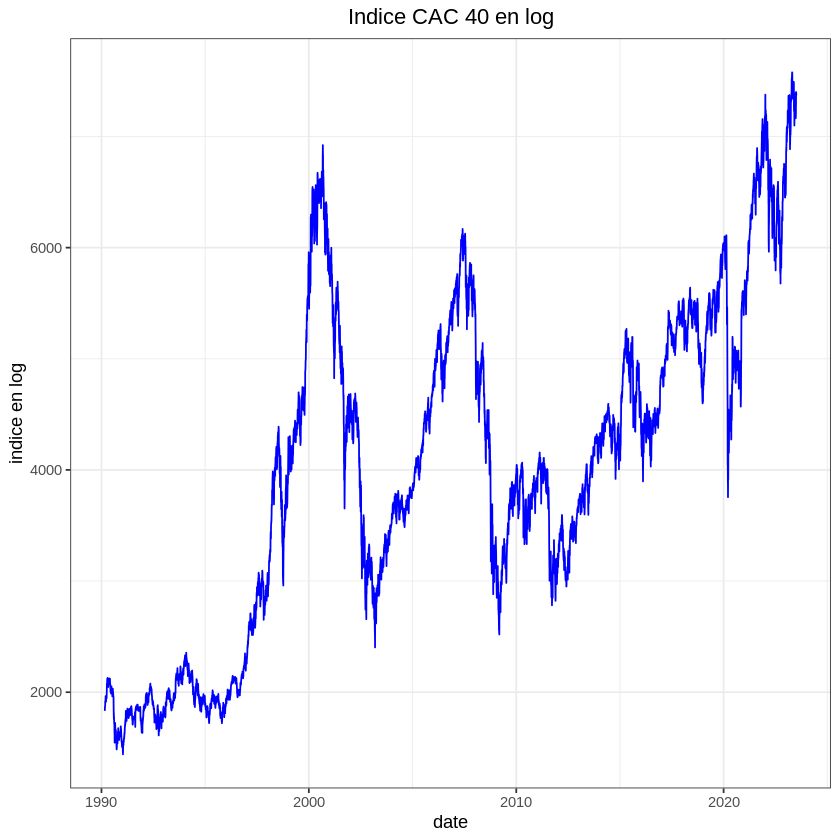

In [26]:
library(ggplot2)
p1<-ggplot(data=CAC40_df,aes(x=Date,y=Adj.Close))+geom_line(colour='blue')+ggtitle('Indice CAC 40 en log')+xlab('date')+ylab('indice en log')+theme_bw()+theme(plot.title = element_text(hjust = 0.5))
p1

In [27]:
1+1

[1] 2